<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/Copy_of_Employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model for Predicting Employee Attrition
We are building a simple model using the ***employee_attrition_test.csv*** data set for predicting an employee attrition. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo & Nancy Wachira Date: 5/15/2021


# import libraries

In [4]:
#data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



**1. Read dataset and display columns¶**


In [11]:
#hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
#hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')


**Display records**

In [12]:
hr_attrition_train_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


# Explotaroty Data Analysis



1.found out the shape of the data - how rows and columns do we have
2.   List item



In [13]:

#info() is used to check the Information about the data and the datatypes of each respective attribute.


hr_attrition_train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [15]:
#The shape attribute tells us a number of observations and variables we have in the data set. 
#It is used to check the dimension of data. The train data set has 1029 observations and 35 variables in the data set.

hr_attrition_train_df.shape

(1029, 35)

In [14]:
#@title Default title text
#Handling Missing Value
#Check for missing value in any column
hr_attrition_train_df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [16]:
#Let’s take a more detailed look at what data is actually missing:
total = hr_attrition_train_df.isnull().sum().sort_values(ascending=False)
percent_1 = hr_attrition_train_df.isnull().sum()/hr_attrition_train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)



,Total,%
Age,136,13.2
DistanceFromHome,95,9.2
DailyRate,27,2.6
BusinessTravel,5,0.5
MaritalStatus,5,0.5


In [17]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df
df2=hr_attrition_train_df.copy()
df2.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [18]:
#Verify missing values in the database
df2.isnull().sum()



Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [19]:
#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df2.loc[df2.loc[:,i].isnull(),i]=df2.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df2.isnull().sum()


count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                     0
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#imputation with median
missing_ages = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_ages:
 df2.loc[df2.loc[:,i].isnull(),i]=df2.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df2.isnull().sum()

In [ ]:
#imputation with median
missing_distance = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_distance:
 df2.loc[df2.loc[:,i].isnull(),i]=df2.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df2.isnull().sum()

In [22]:
hr_attrition_train_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


Label encoding Marital Status using category *codes*

In [38]:
hr_attrition_train_df['MaritalStatus']=hr_attrition_train_df['MaritalStatus'].astype('category')
#print datatypes - marital status changes to category
hr_attrition_train_df.dtypes
hr_attrition_train_df['MaritalStatus']=hr_attrition_train_df['MaritalStatus'].cat.codes
hr_attrition_train_df.head(10)




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,1,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,1,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,3,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,2,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,3,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,2,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,1,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,2,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,3,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,1,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


label encoding Gender feature using – scikit-learn library approach


In [39]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
hr_attrition_train_df['Gender']= label.fit_transform(hr_attrition_train_df['Gender']) 
print(hr_attrition_train_df['Gender'].unique())
hr_attrition_train_df


[1 0]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,1,66,3,4,Research Director,4,1,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,1,84,3,2,Manufacturing Director,2,1,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,1,31,3,1,Sales Representative,2,3,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,1,99,3,5,Manager,2,2,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,1,87,3,3,Healthcare Representative,2,3,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,1,46,4,2,Laboratory Technician,3,2,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,1,85,4,2,Healthcare Representative,2,3,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,1,48,2,1,Research Scientist,4,2,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,1,46,2,2,Laboratory Technician,2,2,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [40]:
hr_attrition_train_df['BusinessTravel']=hr_attrition_train_df['BusinessTravel'].astype('category')
#print datatypes - marital status changes to category
hr_attrition_train_df.dtypes
hr_attrition_train_df['BusinessTravel']=hr_attrition_train_df['BusinessTravel'].cat.codes
hr_attrition_train_df.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,2,1126.0,Research & Development,1.0,2,Medical,1,997,4,1,66,3,4,Research Director,4,1,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,2,216.0,Research & Development,6.0,2,Medical,1,178,2,1,84,3,2,Manufacturing Director,2,1,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,2,337.0,Sales,7.0,1,Marketing,1,1780,2,1,31,3,1,Sales Representative,2,3,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,1,1246.0,Human Resources,NaN,3,Medical,1,644,1,1,99,3,5,Manager,2,2,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,2,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,1,87,3,3,Healthcare Representative,2,3,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,2,1277.0,Research & Development,15.0,1,Medical,1,582,2,1,56,3,3,Manager,3,2,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,2,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,0,92,2,3,Manufacturing Director,2,1,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,2,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,1,33,2,2,Manufacturing Director,4,2,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,2,890.0,Research & Development,2.0,4,Medical,1,828,3,1,46,3,1,Research Scientist,3,3,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,0,530.0,Sales,16.0,3,Life Sciences,1,1681,3,0,36,3,2,Sales Executive,4,1,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


In [ ]:
df2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,37.0,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


In [ ]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df
df3=hr_attrition_train_df.copy()
df3.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


In [ ]:
df3.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
data = [hr_attrition_train_df, hr_attrition_test_df]

for dataset in data:
    mean = hr_attrition_train_df["Age"].mean()
    std = hr_attrition_test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)

    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = hr_attrition_train_df["Age"].astype(int)
hr_attrition_train_df["Age"].isnull().sum()
hr_attrition_test_df["Age"].isnull().sum()


0

In [ ]:
#print all the data types and thier unique values
for column in hr_attrition_train_df.columns:
  if hr_attrition_train_df[column].dtype==object:
    print(str(column)+':'+str(hr_attrition_train_df[column].unique()))
    print(hr_attrition_train_df[column].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Attrition:['No' 'Yes']
No     853
Yes    176
Name: Attrition, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Department:['Research & Development' 'Sales' 'Human Resources']
Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
EducationField:['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender:['Male' 'Female']
Male      617
F

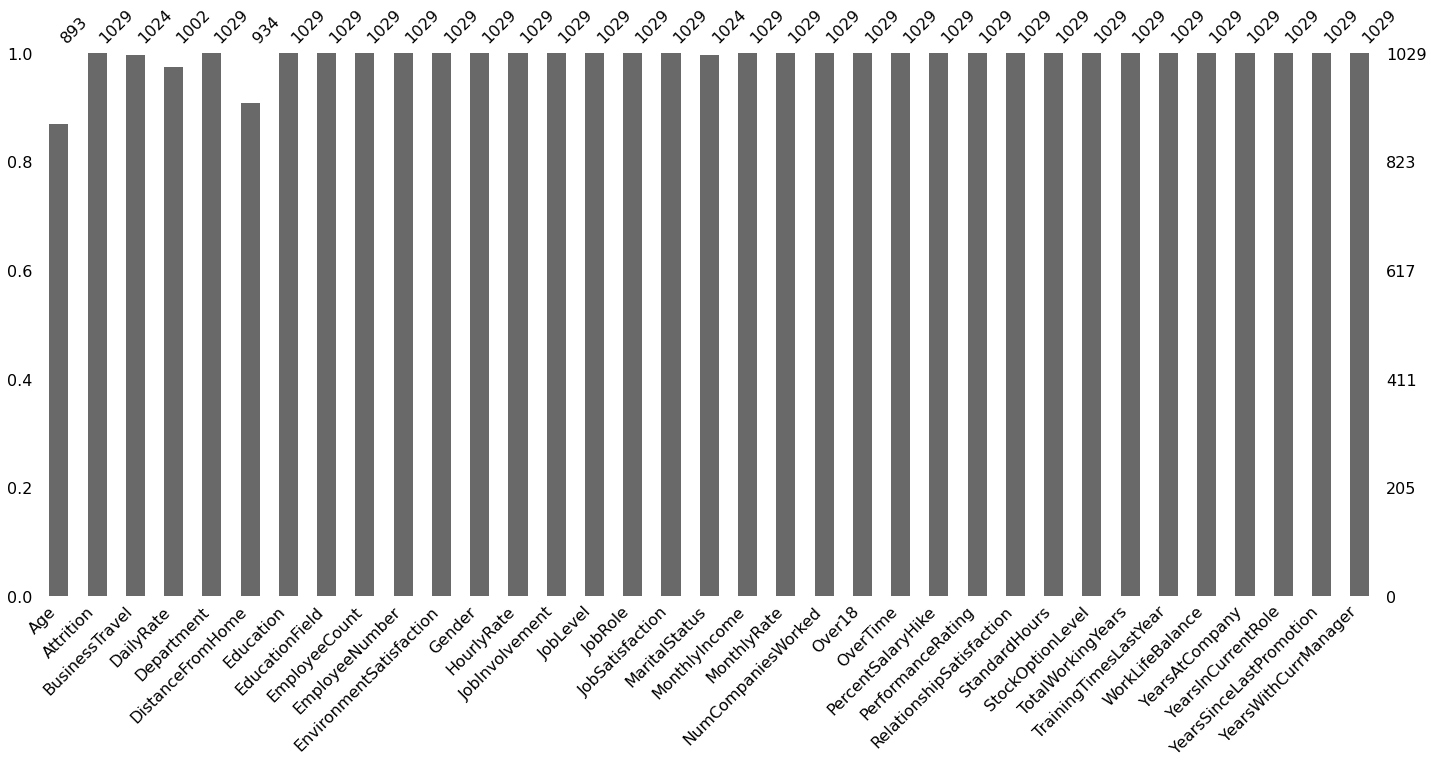

In [ ]:
import missingno as msno
msno.bar(hr_attrition_train_df)


In [ ]:
hr_attrition_train_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,NaN,No,Travel_Rarely,750.0,Research & Development,28.0,3,Life Sciences,1,1596,2,Male,46,4,2,Laboratory Technician,3,Married,3407,25348,1,Y,No,17,3,4,80,2,10,3,2,10,9,6,8
1025,41.0,No,Travel_Rarely,447.0,Research & Development,NaN,3,Life Sciences,1,1814,2,Male,85,4,2,Healthcare Representative,2,Single,6870,15530,3,Y,No,12,3,1,80,0,11,3,1,3,2,1,2
1026,22.0,Yes,Travel_Frequently,1256.0,Research & Development,NaN,4,Life Sciences,1,1203,3,Male,48,2,1,Research Scientist,4,Married,2853,4223,0,Y,Yes,11,3,2,80,1,1,5,3,0,0,0,0
1027,29.0,No,Travel_Rarely,1378.0,Research & Development,13.0,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,Y,Yes,13,3,1,80,1,10,2,3,4,3,0,3


***Training set has 1029 examples and 34 features + te target variable (attrition) 3 of the features are floats, 23 are integer and 9 are objects***

The **BusinessTravel** and **MaritalStatus** has 5 features missing values, which can easily be filled. It will be much more tricky, to deal with the **‘Age’** feature, which has 136 missing values. The **DistanceFromHome** feature needs further investigation it is missing 95, and **DailyRate** feature is missing 27.


Describing data

In [ ]:
hr_attrition_train_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [ ]:
#display both categorical and numerical columns
Categorical_columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
Numerical_columns=['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print('Categorical_columns  +++++',Categorical_columns)
print('Numerical_columns +++++++++',Numerical_columns)
#hr_attrition_train_df.columns.to_list()


Categorical_columns  +++++ ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical_columns +++++++++ ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


*We* can calculate categorical means for other categorical variables such as EducationField and marital status to get a more detailed sense of our data.


In [ ]:
hr_attrition_train_df.groupby('EducationField').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EducationField,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.882353,775.588235,11.933333,3.117647,1.0,1193.647059,2.705882,58.882353,2.882353,2.058824,2.470588,7227.117647,14732.352941,3.235294,15.000000,3.058824,3.000000,80.0,1.117647,11.705882,2.470588,2.823529,5.764706,3.823529,1.411765,3.117647
Life Sciences,37.768817,787.613365,9.658915,2.927230,1.0,1015.157277,2.671362,67.572770,2.704225,2.028169,2.767606,6363.431925,14482.492958,2.579812,15.319249,3.169014,2.643192,80.0,0.812207,11.082160,2.734742,2.727700,7.030516,4.260563,2.035211,4.079812
Marketing,38.919192,708.000000,10.528846,3.118182,1.0,983.563636,2.527273,67.400000,2.727273,2.263636,2.654545,7040.500000,14003.063636,2.572727,15.209091,3.154545,2.672727,80.0,0.890909,11.463636,2.672727,2.763636,7.254545,4.436364,2.181818,4.418182
Medical,38.160142,839.388013,10.098305,2.722561,1.0,1019.896341,2.682927,66.076220,2.737805,2.051829,2.685976,6603.942073,14167.301829,2.713415,15.240854,3.149390,2.762195,80.0,0.856707,11.591463,2.914634,2.740854,7.121951,4.137195,2.295732,3.911585
Other,36.215686,773.396825,9.355932,3.030303,1.0,1061.303030,3.000000,63.969697,2.681818,1.878788,2.787879,5626.015152,13517.909091,2.530303,15.818182,3.196970,2.575758,80.0,0.636364,9.848485,2.696970,2.833333,5.590909,3.803030,1.560606,3.606061
Technical Degree,37.739726,861.543210,9.891892,2.926829,1.0,1080.012195,2.695122,67.292683,2.634146,1.926829,2.597561,5991.378049,14201.365854,2.878049,14.707317,3.146341,2.695122,80.0,0.731707,10.829268,2.780488,2.780488,6.682927,4.414634,2.365854,3.951220


In [ ]:
hr_attrition_train_df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
0,37.786121,819.121729,8.695108,2.894198,1.0,725.205916,2.778157,65.804323,2.784983,2.177474,2.795222,6982.928328,14193.211604,2.664391,15.147895,3.149033,2.753129,80.0,0.824801,12.076223,2.797497,2.782708,7.447099,4.519909,2.250284,4.395904
1,33.469274,762.502793,10.368715,2.804469,1.0,763.905028,2.391061,64.854749,2.502793,1.664804,2.525140,4872.938547,14631.011173,2.916201,15.195531,3.156425,2.597765,80.0,0.458101,8.290503,2.631285,2.670391,5.189944,2.988827,1.972067,2.899441


In [ ]:
hr_attrition_train_df.groupby('MaritalStatus').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,,,,,,,,,,,,,,,,,
Divorced,38.019608,850.635135,9.946602,2.882609,1.0,985.382609,2.713043,66.491304,2.739130,2.065217,2.734783,6504.747826,14188.239130,2.826087,15.034783,3.152174,2.713043,80.0,1.530435,11.573913,2.886957,2.760870,7.517391,4.395652,1.969565,4.173913
Married,39.095588,814.093074,10.071594,2.907173,1.0,1054.419831,2.654008,67.234177,2.746835,2.105485,2.677215,6732.900844,14237.147679,2.624473,15.371308,3.160338,2.658228,80.0,1.029536,11.632911,2.727848,2.751055,7.103376,4.451477,2.322785,4.061181
Single,36.068841,747.891374,9.810345,2.884375,1.0,1011.378125,2.709375,66.118750,2.650000,1.925000,2.753125,5941.631250,14389.646875,2.559375,15.234375,3.159375,2.734375,80.0,0.000000,10.265625,2.803125,2.740625,6.253125,3.690625,1.931250,3.775000


In [ ]:
hr_attrition_train_df.groupby('BusinessTravel').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
BusinessTravel,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-Travel,36.224299,0.102804,820.775701,10.018692,2.869159,1.0,760.084112,2.710280,65.336449,2.626168,2.102804,2.822430,6537.018692,14973.457944,2.710280,15.102804,3.130841,2.775701,80.0,0.841121,10.467290,2.672897,2.841121,7.009346,3.971963,2.364486,4.177570
Travel_Frequently,36.736585,0.248780,791.380488,9.619512,2.858537,1.0,748.741463,2.634146,64.804878,2.731707,2.053659,2.726829,6347.882927,14132.780488,2.507317,15.263415,3.175610,2.751220,80.0,0.780488,11.121951,2.839024,2.775610,7.121951,4.321951,2.258537,4.170732
Travel_Rarely,37.262735,0.156836,812.922252,8.652815,2.886059,1.0,723.021448,2.734584,65.918231,2.754692,2.099196,2.745308,6715.111260,14202.954424,2.761394,15.134048,3.146113,2.713137,80.0,0.746649,11.660858,2.764075,2.749330,7.057641,4.285523,2.164879,4.130027


In [ ]:
hr_attrition_train_df.groupby('Department').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,,,,,,,
Human Resources,39.421053,0.157895,782.684211,8.052632,2.973684,1.0,823.342105,2.631579,62.210526,2.815789,2.184211,2.447368,7380.078947,14688.657895,3.394737,14.763158,3.131579,2.973684,80.0,0.763158,12.815789,2.605263,2.894737,8.210526,4.184211,2.078947,4.078947
Research & Development,37.126961,0.152639,820.243937,8.990014,2.874465,1.0,723.639087,2.724679,65.831669,2.738944,2.001427,2.760342,6402.308131,14157.572040,2.710414,15.213980,3.162625,2.723252,80.0,0.773181,11.504993,2.757489,2.718973,6.860200,4.146933,2.151213,4.031384
Sales,36.617555,0.206897,789.225705,9.062696,2.877743,1.0,738.673981,2.695925,65.639498,2.724138,2.275862,2.761755,7027.551724,14458.172414,2.617555,15.075235,3.125392,2.705329,80.0,0.739812,11.119122,2.815047,2.846395,7.379310,4.520376,2.332288,4.394984


In [ ]:
hr_attrition_train_df.groupby('OverTime').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,36.858855,0.107856,808.454061,8.781625,2.889481,1.0,733.798935,2.653795,65.800266,2.741678,2.101198,2.753662,6629.750999,14300.868176,2.741678,15.189081,3.149134,2.695073,80.0,0.754993,11.452730,2.837550,2.790945,7.077230,4.308921,2.237017,4.190413
Yes,37.537459,0.319218,812.205212,9.459283,2.853420,1.0,726.749186,2.856678,65.260586,2.726384,2.065147,2.739414,6616.635179,14185.120521,2.622150,15.074919,3.153094,2.804560,80.0,0.781759,11.394137,2.602606,2.697068,7.035831,4.143322,2.120521,4.026059


In [ ]:
hr_attrition_train_df.groupby('JobRole').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,39.965909,0.090909,883.079545,9.954545,2.977273,1.0,739.147727,2.795455,68.295455,2.670455,2.522727,2.829545,7769.727273,13817.704545,2.931818,15.181818,3.147727,2.704545,80.0,0.784091,14.750000,2.579545,2.647727,8.636364,4.897727,3.079545,4.454545
Human Resources,36.800000,0.200000,802.333333,8.033333,2.866667,1.0,826.400000,2.533333,61.900000,2.833333,1.533333,2.366667,4573.300000,14924.266667,3.533333,15.033333,3.133333,3.100000,80.0,0.700000,8.900000,2.500000,2.900000,5.633333,3.900000,1.400000,3.333333
Laboratory Technician,34.079787,0.260638,805.622340,9.170213,2.787234,1.0,712.680851,2.643617,65.510638,2.670213,1.250000,2.813830,3240.632979,13652.074468,2.606383,15.186170,3.191489,2.696809,80.0,0.781915,7.734043,2.904255,2.707447,5.021277,3.063830,1.457447,3.356383
Manager,46.658228,0.063291,826.341772,7.468354,2.886076,1.0,720.468354,2.784810,66.227848,2.721519,4.303797,2.620253,17139.582278,14694.101266,2.962025,14.759494,3.151899,2.873418,80.0,0.772152,24.341772,2.898734,2.772152,15.088608,6.721519,5.253165,6.341772
Manufacturing Director,38.411215,0.065421,823.186916,9.130841,2.897196,1.0,733.102804,2.981308,63.485981,2.700935,2.485981,2.710280,7438.000000,14940.345794,2.775701,15.364486,3.177570,2.691589,80.0,0.738318,13.074766,2.672897,2.794393,7.588785,5.205607,2.065421,5.018692
Research Director,43.629032,0.032258,797.064516,7.387097,3.177419,1.0,756.306452,2.403226,63.903226,2.838710,4.000000,2.725806,16115.774194,15186.838710,3.790323,14.693548,3.064516,2.725806,80.0,0.806452,21.354839,2.822581,2.822581,10.338710,6.225806,2.709677,5.741935
Research Scientist,34.331776,0.177570,805.051402,9.252336,2.841121,1.0,716.747664,2.696262,67.317757,2.803738,1.172897,2.780374,3152.677570,13991.710280,2.359813,15.485981,3.172897,2.714953,80.0,0.757009,7.495327,2.672897,2.691589,4.901869,3.186916,1.467290,3.065421
Sales Executive,36.909483,0.168103,780.961207,9.267241,2.961207,1.0,746.137931,2.689655,64.922414,2.762931,2.336207,2.754310,6917.797414,14409.215517,2.732759,14.943966,3.120690,2.706897,80.0,0.788793,11.193966,2.784483,2.823276,7.568966,4.844828,2.482759,4.836207
Sales Representative,30.448276,0.431034,810.586207,8.672414,2.482759,1.0,717.862069,2.793103,65.741379,2.637931,1.068966,2.758621,2610.396552,14246.706897,1.810345,15.362069,3.103448,2.655172,80.0,0.603448,4.017241,3.000000,2.948276,2.620690,1.793103,0.862069,1.517241


In [ ]:
hr_attrition_train_df.groupby('Over18').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Over18,,,,,,,,,,,,,,,,,,,,,,,,,,,
Y,37.055766,0.169187,809.542533,8.978261,2.879017,1.0,731.753308,2.712665,65.643667,2.73724,2.090737,2.749527,6625.94518,14267.281664,2.706994,15.155955,3.150284,2.726843,80.0,0.76276,11.435728,2.769376,2.763705,7.065217,4.26087,2.203214,4.142722


In [ ]:
hr_attrition_train_df.groupby('Gender').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,,,,,,,,,,,,,,,,,,
Female,37.394977,0.162100,828.422374,8.981735,2.924658,1.0,744.515982,2.723744,65.828767,2.746575,2.139269,2.673516,6757.189498,14553.675799,2.881279,15.123288,3.155251,2.664384,80.0,0.739726,11.888128,2.847032,2.764840,7.283105,4.438356,2.340183,4.305936
Male,36.816129,0.174194,796.204839,8.975806,2.846774,1.0,722.737097,2.704839,65.512903,2.730645,2.056452,2.803226,6533.227419,14064.958065,2.583871,15.179032,3.146774,2.770968,80.0,0.779032,11.116129,2.714516,2.762903,6.911290,4.135484,2.106452,4.027419


# VISUALIZE DATA

In [ ]:
#visualize the data for you to get the first impression of the data


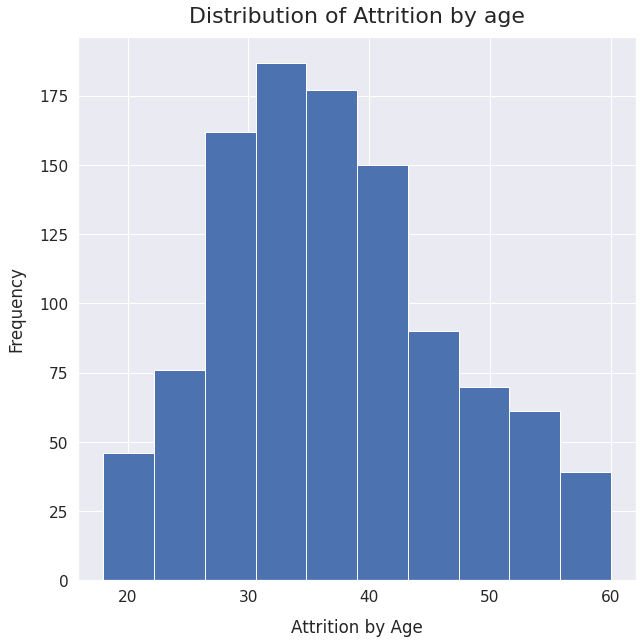

In [ ]:
sns.set(font_scale=1.4)
hr_attrition_train_df['Age'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Attrition by Age", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Attrition by age", y=1.015, fontsize=22);


IndexError: ignored

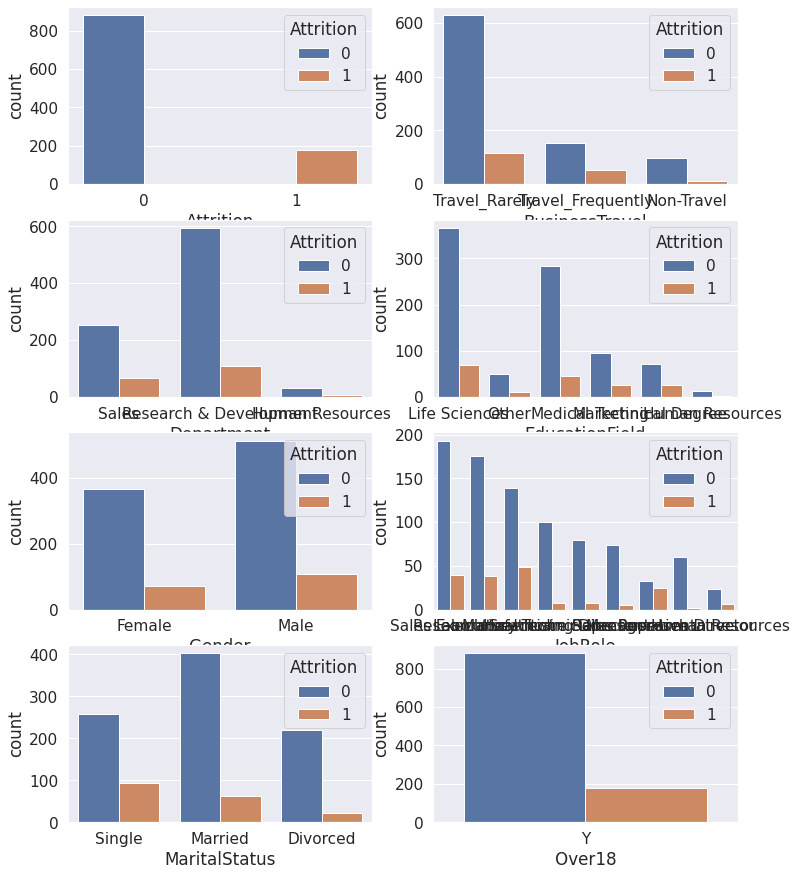

In [ ]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(Categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=hr_attrition_train_df,hue='Attrition',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [ ]:
#Education feature

#draw a bar plot of survival by Pclass
sns.barplot(x="Education", y="MonthlyIncome", data=hr_attrition_train_df)

#print percentage of people by Pclass that survived
print("Percentage of Education = 1 :", hr_attrition_train_df["MonthlyIncome"][hr_attrition_train_df["Education"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Education = 2 :", hr_attrition_train_df["MonthlyIncome"][hr_attrition_train_df["Education"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Education = 3 :", hr_attrition_train_df["MonthlyIncome"][hr_attrition_train_df["Education"] == 3].value_counts(normalize = True)[1]*100)

#From the above graph passengers with higher economic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)


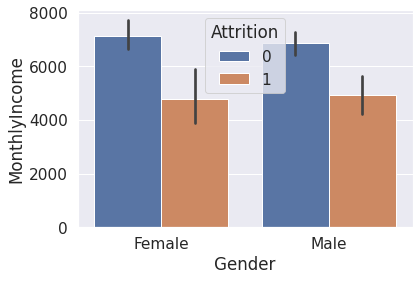

In [ ]:
#Data Visualization
#Gender,MonthlyIncome,Attrition feature

#draw a bar plot of survival by sex
sns.barplot(x="Gender", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)



'''Plots above convey following things about the dataset:
Attrition status: About employees who leave through attrition.
Sex: There are more Men than Women who are employed,at the same time more men than women leave through attrition(approx.)
Martial Status: Single people are more likely to be leave employement through attrition. More married people who are employed probably it's because they have a lot of responsibities.
Over18: Majority of the population over18 are employed are also likely to stay on the job.)'''

In [ ]:
#draw a bar plot of survival by sex
ax = sns.heatmap(hr_attrition_train_df.corr(), cmap="coolwarm" annot=True, fmt="d")

flights = hr_attrition_train_df.pivot("HourlyRate", "Education", "MonthyIncome")
ax = sns.heatmap(flights)
plt.title("Heatmap attrition Data")
plt.show()


SyntaxError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2559     3
3452     3
2741     3
2342     3
2610     3
        ..
3629     1
9439     1
3291     1
9434     1
14336    1
Name: MonthlyIncome, Length: 991, dtype: int64

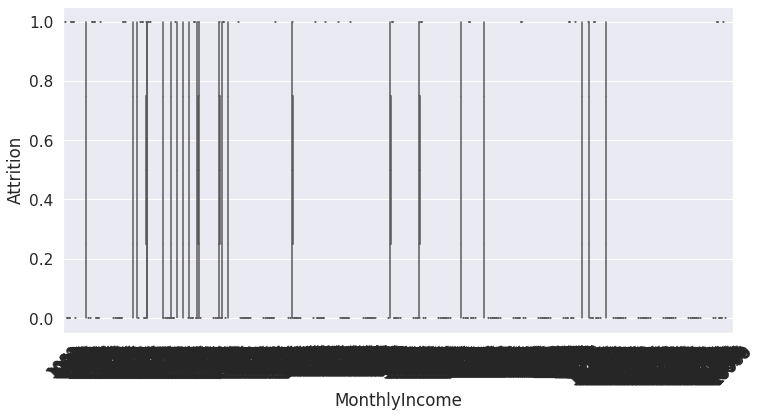

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'Attrition', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2559     3
3452     3
2741     3
2342     3
2610     3
        ..
3629     1
9439     1
3291     1
9434     1
14336    1
Name: MonthlyIncome, Length: 991, dtype: int64

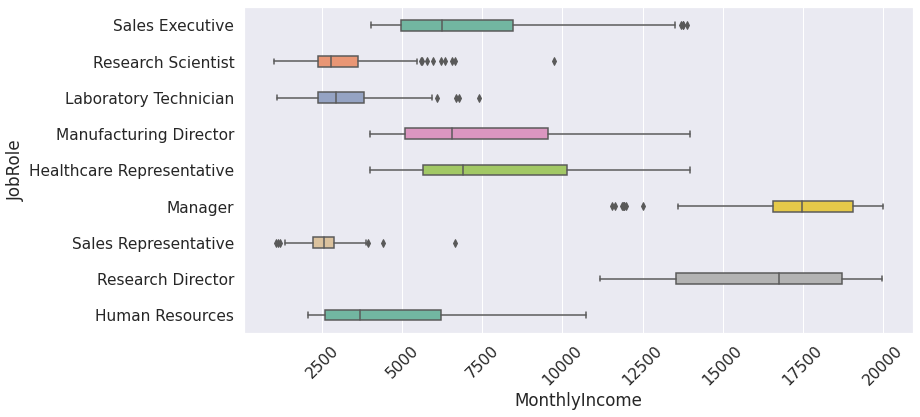

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'JobRole', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

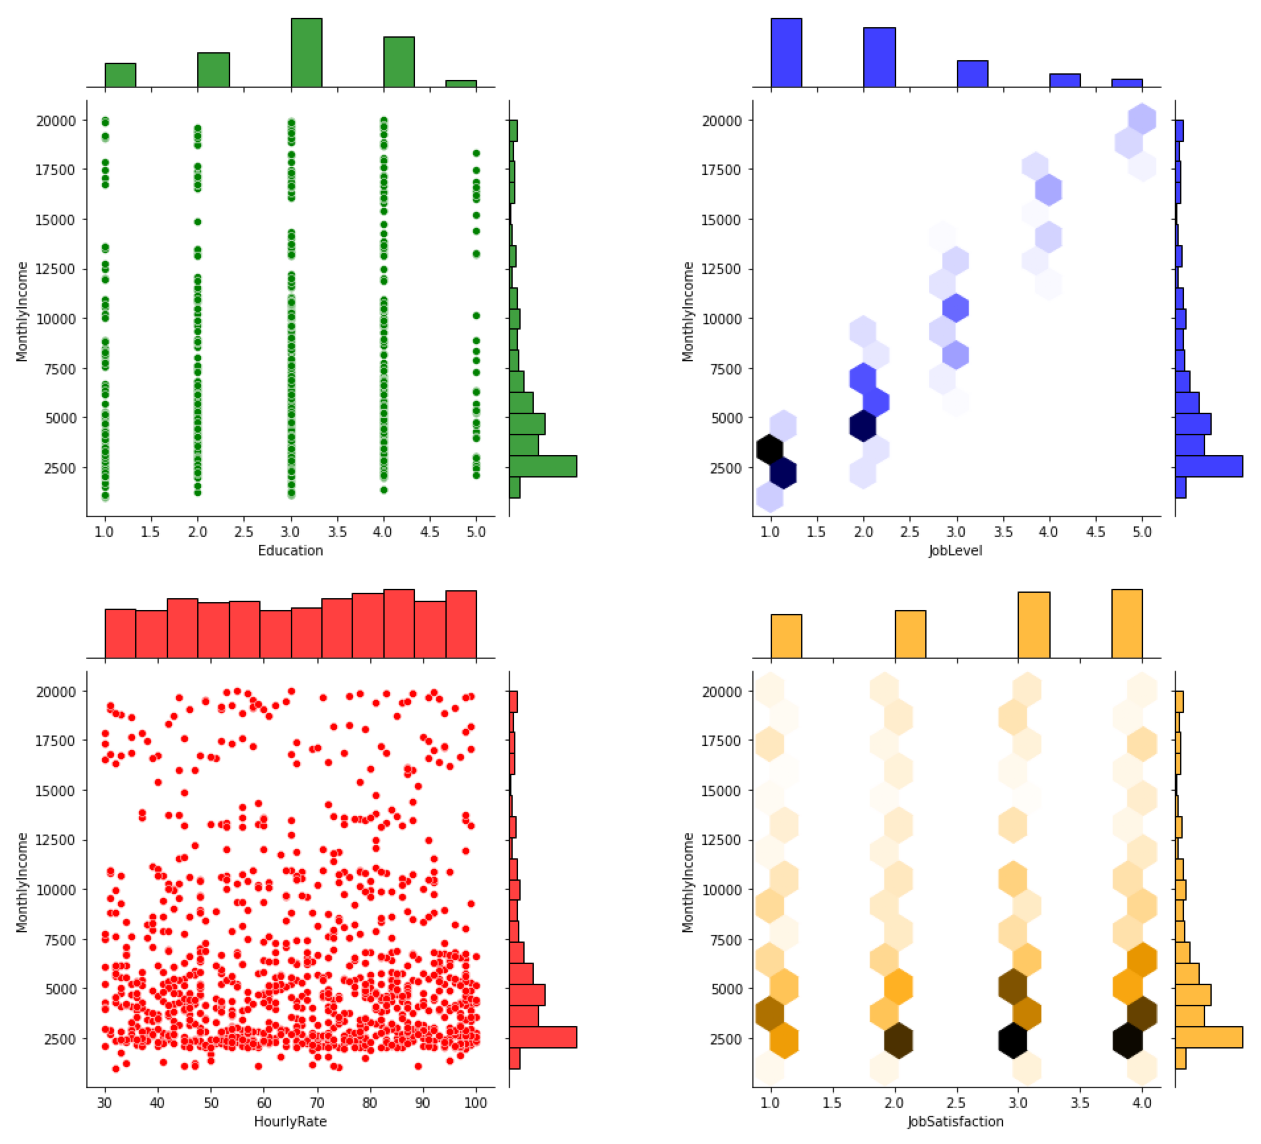

In [ ]:
import matplotlib.image as mpimg
JG1 = sns.jointplot('Education', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='g')
JG2 = sns.jointplot('JobLevel', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='b')
JG3 = sns.jointplot('HourlyRate', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='r')
JG4 = sns.jointplot('JobSatisfaction', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='orange')
JG1.savefig('JG1.png')
plt.close(JG1.fig)
JG2.savefig('JG2.png')
plt.close(JG2.fig)
JG3.savefig('JG3.png')
plt.close(JG3.fig)
JG4.savefig('JG4.png')
plt.close(JG4.fig)
f, ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].imshow(mpimg.imread('JG1.png'))
ax[0,1].imshow(mpimg.imread('JG2.png'))
ax[1,0].imshow(mpimg.imread('JG3.png'))
ax[1,1].imshow(mpimg.imread('JG4.png'))
[ax.set_axis_off() for ax in ax.ravel()]
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


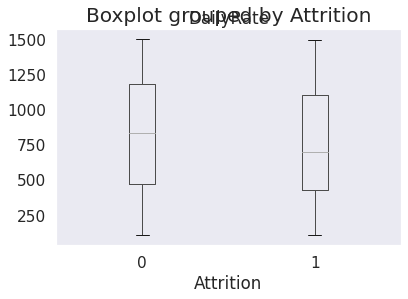

In [ ]:
hr_attrition_train_df.boxplot(by ='Attrition', column =['DailyRate'], grid = False)


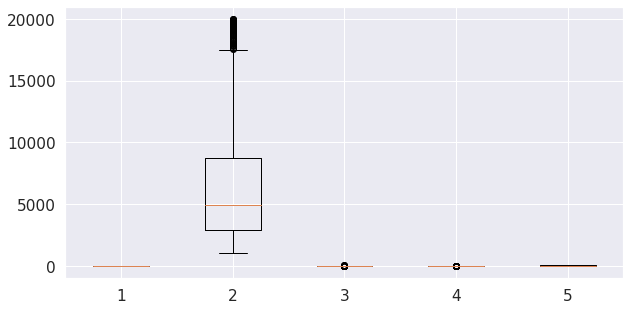

In [ ]:

Education = hr_attrition_train_df['Education']
MonthlyIncome = hr_attrition_train_df['MonthlyIncome']
YearsAtCompany = hr_attrition_train_df['YearsAtCompany']
PerformanceRating = hr_attrition_train_df['PerformanceRating']
Age = hr_attrition_train_df['Age']
columns = [Education, MonthlyIncome,YearsAtCompany,PerformanceRating,Age]
fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(columns)
plt.show()

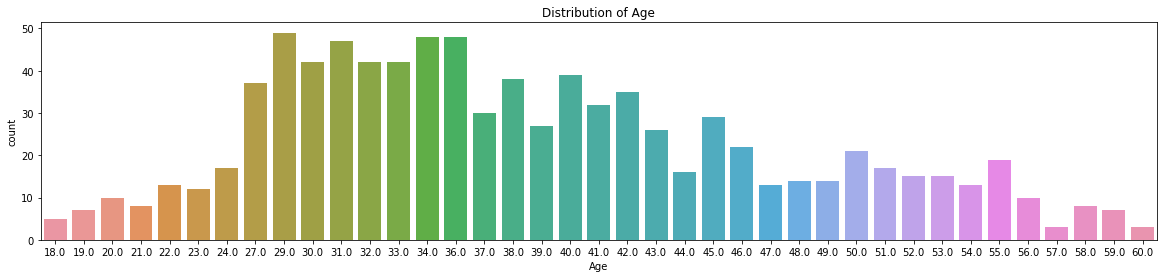

In [ ]:
# See the distribution of gender to recognize different distributions
plt.subplots(figsize=(20,4))
sns.countplot(x='Age', data=hr_attrition_train_df);
plt.title('Distribution of Age');


#What Features Are Linked To Employee Attrition?


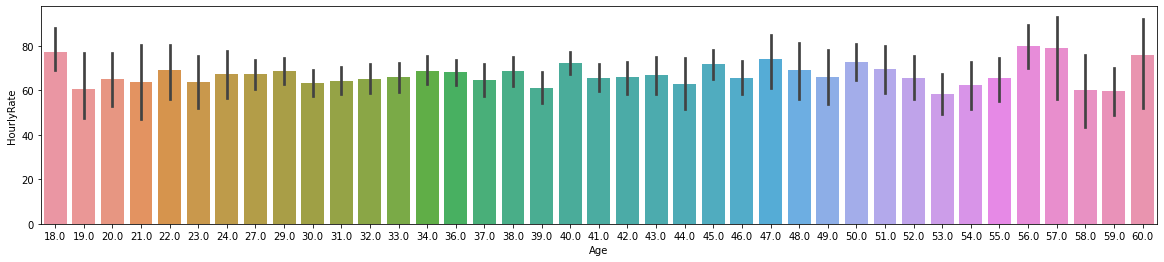

In [ ]:
plt.subplots(figsize=(20,4))
sns.barplot(data=hr_attrition_train_df, x="Age", y="HourlyRate")


In [ ]:
hr_attrition_train_df['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

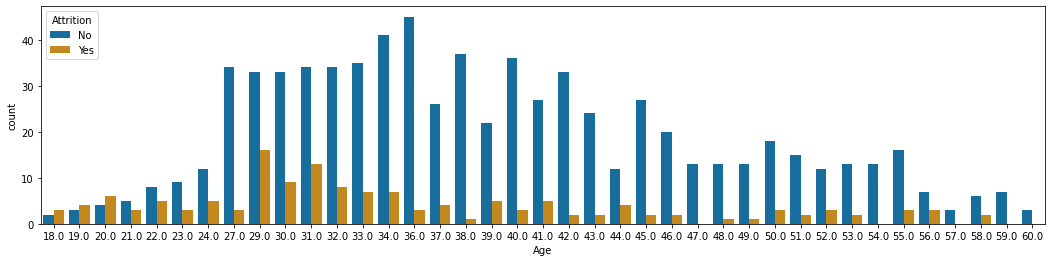

In [ ]:
#visualize number of number of employees who have left the company
plt.subplots(figsize=(18,4))
sns.countplot(x="Age", hue="Attrition",data=hr_attrition_train_df,palette='colorblind')


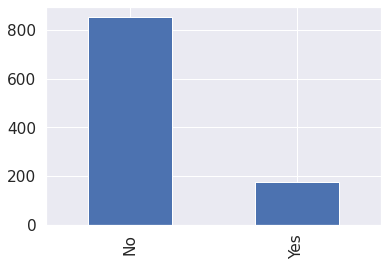

In [ ]:
#visualizing categorical variables
hr_attrition_train_df['Attrition'].value_counts().plot.bar()


*We access the Age column, call the plot method and pass in hist to the kind argument to output a histogram plot.*


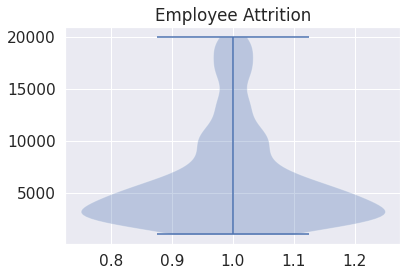

In [ ]:
# boxplot
plt.title('Employee Attrition')
plt.violinplot(hr_attrition_train_df['MonthlyIncome'])
plt.show()

shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


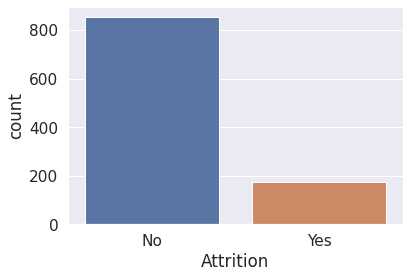

In [ ]:
sns.countplot(hr_attrition_train_df['Attrition'])

Since the Attrition is not equally distributed, we obtain bars with unequal heights. The numbers of employees leaving is lower than the ones who remain.



# Predictive Modeling


In [ ]:
Linear Regression 



In [ ]:
K-Nearest Neighbors 


In [ ]:
#Logistic Regeression
logreg = LogisticRegression()
logreg.fit(hr_attrition_train_df, hr_attrition_test_df)

Y_pred = logreg.predict(hr_attrition_train_df)
acc_log = round(logreg.score(hr_attrition_train_df, hr_attrition_test_df)*100, 2)
acc_log

In [ ]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(hr_attrition_train_df, hr_attrition_test_df)

Y_prediction = random_forest.predict(hr_attrition_train_df)

random_forest.score(hr_attrition_train_df, hr_attrition_test_df)
acc_random_forest = round(random_forest.score(hr_attrition_train_df, hr_attrition_test_df)*100,2)
acc_random_forest

In [ ]:
#SVC,LinearSVC
#DecisionTreeClassifier
#RandomForestClassifier


In [ ]:
#5: Predict on dataset model calculate Accuracy Score
#6: Calculate the model accuracy
#7: Create a confusion matrix with a Pandas cross table - confusion matrix
#8: Print the TN, FN, TP, FP values
# 9: Print the model precision value
# precision is the ratio of  tp / (tp + fp)
#10: # recall = the ratio tp / (tp + fn)
#11: Visualize the confusion matrix with a Heatmap


Predictive model evaluation
results and discussions
Conclusion